In [2]:
from thermostate import State, Q_, units
substance = 'air'
p_1 = Q_(1.0, 'bar')
T_1 = Q_(300.0, 'K')
T_3 = Q_(1700.0, 'K')
p2_p1 = Q_(8.0, 'dimensionless')
p_low = Q_(2.0, 'dimensionless')
p_high = Q_(50.0, 'dimensionless')

In [3]:
st_1 = State(substance, T=T_1, p=p_1)
h_1 = st_1.h.to('kJ/kg')
s_1 = st_1.s.to('kJ/(kg*K)')

s_2 = s_1
p_2 = p_1*p2_p1
st_2 = State(substance, p=p_2, s=s_2)
h_2 = st_2.h.to('kJ/kg')
T_2 = st_2.T

p_3 = p_2
st_3 = State(substance, p=p_3, T=T_3)
h_3 = st_3.h.to('kJ/kg')
s_3 = st_3.s.to('kJ/(kg*K)')

s_4 = s_3
p_4 = p_1
st_4 = State(substance, p=p_4, s=s_4)
h_4 = st_4.h.to('kJ/kg')
T_4 = st_4.T

In [4]:
W_c = h_1 - h_2
W_t = h_3 - h_4
W_net = W_c + W_t

In [5]:
Q_23 = h_3 - h_2
eta = W_net/Q_23

In [6]:
import numpy as np
eta_l = []
W_net_l = []
p_range = np.arange(p_low, p_high, 1)
for p_ratio in p_range:
    s_2 = s_1
    p_2 = p_1*p_ratio
    st_2 = State(substance, p=p_2, s=s_2)
    h_2 = st_2.h.to('kJ/kg')
    T_2 = st_2.T

    p_3 = p_2
    st_3 = State(substance, p=p_3, T=T_3)
    h_3 = st_3.h.to('kJ/kg')
    s_3 = st_3.s.to('kJ/(kg*K)')

    s_4 = s_3
    p_4 = p_1
    st_4 = State(substance, p=p_4, s=s_4)
    h_4 = st_4.h.to('kJ/kg')
    T_4 = st_4.T
    
    W_c = h_1 - h_2
    W_t = h_3 - h_4
    W_net = W_c + W_t
    W_net_l.append(W_net.magnitude)
    
    Q_23 = h_3 - h_2
    eta = W_net/Q_23
    eta_l.append(eta.magnitude)

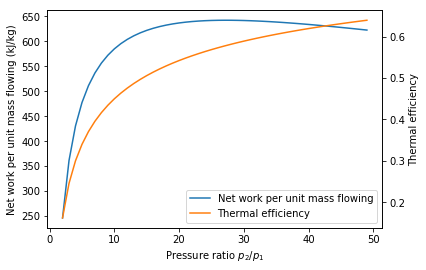

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, work_ax = plt.subplots()
work_ax.plot(p_range, W_net_l, label='Net work per unit mass flowing', color='C0')
eta_ax = work_ax.twinx()
eta_ax.plot(p_range, eta_l, label='Thermal efficiency', color='C1')
work_ax.set_xlabel('Pressure ratio $p_2/p_1$')
work_ax.set_ylabel('Net work per unit mass flowing (kJ/kg)')
eta_ax.set_ylabel('Thermal efficiency')
lines, labels = work_ax.get_legend_handles_labels()
lines2, labels2 = eta_ax.get_legend_handles_labels()
work_ax.legend(lines + lines2, labels + labels2, loc='best');





